## Data Load

In [1]:
import pandas as pd

In [2]:
top_1000_1 = pd.read_csv('top_1000_1.csv')
top_1000_2 = pd.read_csv('top_1000_2.csv')
dataset = pd.read_csv('downsampling_only.csv')
dataset = dataset.drop(columns='Unnamed: 0')
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
8319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
8320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
8321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
8322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


## Data Augmentation

### 데이터 할당
- label = 5.0에 같다시피한 데이터 286개 할당 -> 총 388개
- label = 4.8에 400개 할당 -> 총 459개
- label = 4.6에 350개 할당 -> 총 431개
- label = 4.5에 450개 할당 -> 총 461개
- label = 4.4에 340개 할당 -> 총 549개
- label = 4.2에 130개 할당 -> 총 556개

### label = 5.0인 데이터셋 따로 고려
label이 5점인 데이터셋은 큰 차이가 없어야 한다고 판단

In [3]:
import re
import unicodedata

def preprocess_text(text):
    # 소문자로 변환
    text = text.lower()
    # 한글, 영어, 공백을 제외한 모든 문자 제거
    text = re.sub(r'[^가-힣a-zA-Z\s]', '', text)
    # 공백 제거
    text = ''.join(text.split())

    return text

def compare_sentences(sentence1, sentence2):
    preprocessed_sentence1 = preprocess_text(sentence1)
    preprocessed_sentence2 = preprocess_text(sentence2)
    
    return preprocessed_sentence1 == preprocessed_sentence2

# 예시
sentence1 = "잔잔한 감동으로 다가온 영화,"
sentence2 = "잔잔한 감동으로 다가온영화"

result = compare_sentences(sentence1, sentence2)
print(result)  # True 또는 False

True


In [4]:
top_1000_1['are_equal'] = top_1000_1.apply(lambda row: compare_sentences(row['sentence_1'], row['sentence_2']), axis=1)
equal_1 = top_1000_1[top_1000_1['are_equal']]
equal_1

,Unnamed: 0,sentence_1,sentence_2,cos_sim,are_equal
0,8279,가능함... 가능하겠지... 가능할거야... 바보가 아닌 이상.,가능함... 가능하겠지.... 가능할거야... 바보가 아닌 이상.,0.999396,True
1,4601,지지율이 40% 대라고 ?? 믿을수없다!!,지지율이 40 % 대라고??? 믿을수없다!!,0.998864,True
2,3605,청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고 무분별한 비판을 허용해주세요,"청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고, 무분별한 비판을 허용해주세요",0.998849,True
4,1505,우리가 어떤 세상에 살고 있는지... 불편한 진실.,우리가 어떤 세상에 살고 있는지.... 불편한 진실.,0.998693,True
5,3916,오! 저도 요즘 다양한 요리에 도전중인데 멋져요!!,! 오! 저도 요즘 다양한 요리에 도전중인데 멋져요!!,0.998649,True
...,...,...,...,...,...
841,5904,시간이넘는닥터지바고도 거뜬히 보는 내가.,시간이넘는닥터지바고도. 거뜬히 보는 내가.,0.976432,True
849,214,참여연대를 위한 위원회 국민들은 없다,- 참여연대를 위한 위원회 국민들은 없다,0.975965,True
869,3518,이선균연기/목소리톤은 맨날 발전이 없다!,이선균연기 / 목소리톤은. 맨날 발전이 없다!,0.974383,True
918,2882,오토바이 전 세계 자유로 자동차 폐지 요청,"오토바이 전, 세계 자유로 자동차 폐지 요청",0.969996,True


In [5]:
top_1000_2['are_equal'] = top_1000_2.apply(lambda row: compare_sentences(row['sentence_1'], row['sentence_2']), axis=1)
equal_2 = top_1000_2[top_1000_2['are_equal']]
equal_2

,Unnamed: 0,sentence_1,sentence_2,cos_sim,are_equal
1,3149,아 뻔한 스토리 ......ㅡ..ㅡ,아 뻔한 스토리....... ㅡ.. ㅡ,0.999486,True
3,2945,150만원 이하 통장압류 금지법 ... 빨리 만들어주세요 ...,150만원 이하 통장압류 금지법... 빨리 만들어주세요....,0.999343,True
4,1118,넘나 좋았던 제주도 비양도 캠핑... 크억.. 사진보니 너무 땡기네요ㅎㅎ,넘나 좋았던 제주도 비양도 캠핑... 크억... 사진보니 너무 땡기네요ㅎㅎ,0.999253,True
6,1215,크아~~ 모두 넘 즐거우셨던 것 같네요!!,크아 ~ ~ ~ 모두 넘 즐거우셨던 것 같네요!!,0.999011,True
7,8388,그것은 운명의 데스티니.. 바람의 윈드.. 사막의 데저트… ㅎㅎㅎ,그것은 운명의 데스티니.. 바람의 윈드.. 사막의 데저트 … … ㅎㅎㅎ,0.998968,True
...,...,...,...,...,...
685,1981,ㅊ최고의 로멘스 드라마 ㅠㅠ,ㅊ최고의 로멘스 드라마! ㅠㅠ,0.979908,True
723,3831,"영어 이름뒤에 ‘께’, ‘께서’와 같은 걸 붙일지 말지 입니다.","영어 이름뒤에 ‘ 께 ’, ‘ 께서 ’ 와 같은 걸 붙일지, 말지 입니다.",0.976422,True
730,131,(잘 어울릴 수 있어요),""" ( 잘 어울릴 수 있어요 )",0.976001,True
741,3668,편은유덕화 벌레무렸누데왜 안죽지그게의구심이지만 정말액션스케일은 세계최강,편은유덕화 벌레무렸누데왜 안죽지그게의구심이지만 정말액션스케일은? 세계최강,0.974552,True


In [7]:
equal = pd.concat([equal_1, equal_2], ignore_index=True)
equal['label'] = 5.0
equal['binary-label'] = 1.0
equal

,Unnamed: 0,sentence_1,sentence_2,cos_sim,are_equal,label,binary-label
0,8279,가능함... 가능하겠지... 가능할거야... 바보가 아닌 이상.,가능함... 가능하겠지.... 가능할거야... 바보가 아닌 이상.,0.999396,True,5.0,1.0
1,4601,지지율이 40% 대라고 ?? 믿을수없다!!,지지율이 40 % 대라고??? 믿을수없다!!,0.998864,True,5.0,1.0
2,3605,청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고 무분별한 비판을 허용해주세요,"청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고, 무분별한 비판을 허용해주세요",0.998849,True,5.0,1.0
3,1505,우리가 어떤 세상에 살고 있는지... 불편한 진실.,우리가 어떤 세상에 살고 있는지.... 불편한 진실.,0.998693,True,5.0,1.0
4,3916,오! 저도 요즘 다양한 요리에 도전중인데 멋져요!!,! 오! 저도 요즘 다양한 요리에 도전중인데 멋져요!!,0.998649,True,5.0,1.0
...,...,...,...,...,...,...,...
292,1981,ㅊ최고의 로멘스 드라마 ㅠㅠ,ㅊ최고의 로멘스 드라마! ㅠㅠ,0.979908,True,5.0,1.0
293,3831,"영어 이름뒤에 ‘께’, ‘께서’와 같은 걸 붙일지 말지 입니다.","영어 이름뒤에 ‘ 께 ’, ‘ 께서 ’ 와 같은 걸 붙일지, 말지 입니다.",0.976422,True,5.0,1.0
294,131,(잘 어울릴 수 있어요),""" ( 잘 어울릴 수 있어요 )",0.976001,True,5.0,1.0
295,3668,편은유덕화 벌레무렸누데왜 안죽지그게의구심이지만 정말액션스케일은 세계최강,편은유덕화 벌레무렸누데왜 안죽지그게의구심이지만 정말액션스케일은? 세계최강,0.974552,True,5.0,1.0


- downsampling된 dataset label = 5.0에 추가

In [8]:
dataset = pd.concat([dataset, equal])
dataset

,id,source,sentence_1,sentence_2,label,binary-label,Unnamed: 0,cos_sim,are_equal
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,NaN,NaN,NaN
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,NaN,NaN,NaN
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,NaN,NaN,NaN
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,NaN,NaN,NaN
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
292,NaN,NaN,ㅊ최고의 로멘스 드라마 ㅠㅠ,ㅊ최고의 로멘스 드라마! ㅠㅠ,5.0,1.0,1981.0,0.979908,True
293,NaN,NaN,"영어 이름뒤에 ‘께’, ‘께서’와 같은 걸 붙일지 말지 입니다.","영어 이름뒤에 ‘ 께 ’, ‘ 께서 ’ 와 같은 걸 붙일지, 말지 입니다.",5.0,1.0,3831.0,0.976422,True
294,NaN,NaN,(잘 어울릴 수 있어요),""" ( 잘 어울릴 수 있어요 )",5.0,1.0,131.0,0.976001,True
295,NaN,NaN,편은유덕화 벌레무렸누데왜 안죽지그게의구심이지만 정말액션스케일은 세계최강,편은유덕화 벌레무렸누데왜 안죽지그게의구심이지만 정말액션스케일은? 세계최강,5.0,1.0,3668.0,0.974552,True


- 나머지 데이터셋은 [4.2, 5.0)에 분할 할당

In [9]:
equal_1 = top_1000_1[top_1000_1['are_equal']]
equal_1_filtered = top_1000_1[~top_1000_1.index.isin(equal_1.index)]
equal_1_filtered

,Unnamed: 0,sentence_1,sentence_2,cos_sim,are_equal
3,1642,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기 바랍니다.,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기를 바랍니다.,0.998761,False
8,5109,그 와중에 눈감으신 순간을 캡쳐해버렸네요…,그 와중에서 눈감으신 순간을 캡쳐해버렸네요 …,0.998501,False
10,7830,ㅋㅋ 사다리타기로 한분만 제외당할수 있으십니다..!!,ㅋㅋ 사다리타기로 한분만 제외당할수가 있으십니다..!!,0.998336,False
12,3255,골프장이 체육시설의 설치이용에 관한 법률 제21조를 준수하게 해주세요,골프장이 체육시설의 설치이용에 관한 법률 제21조를 준수하게끔 해주세요,0.998194,False
15,8661,"주택가 도로에 일부러 소리내는 오토바이, 챠량 단속좀 합시다.","주택가 도로에 일부러 소리내는 오토바이, 챠량 단속좀 좀 합시다.",0.998167,False
...,...,...,...,...,...
995,212,시대를 타지 않는 명작...셰익스피어 원작 그자체,시대를 타지 않는 한 명작... 셰익스피어 원작 그자체,0.960833,False
996,1517,공유가 필요하신 페이지 링크 공유주실 수 있을까요?,공유가 필요하신 페이지 링크 공유주실 알 수 있을까요?,0.960741,False
997,7036,진짜 빨리 써주셨네요 ㅎㅎ,진짜 너무 빨리 써주셨네요 ㅎㅎ,0.960638,False
998,2825,이정도면 잘 만들어진 속편,이정도면 잘 만들어진다 속편,0.960484,False


In [10]:
equal_2 = top_1000_2[top_1000_2['are_equal']]
equal_2_filtered = top_1000_2[~top_1000_2.index.isin(equal_2.index)]
equal_2_filtered

,Unnamed: 0,sentence_1,sentence_2,cos_sim,are_equal
0,4899,팔 언제 뺄 수 있나요 ㅋㅋ,팔 언제 뺄릴 수 있나요 ㅋㅋ,1.000000,False
2,2947,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적 장치를 마련해주시기 바랍니다,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적인 장치를 마련해주시기 ...,0.999481,False
5,3123,페북보다보니 인공지능 관련 특허관련 자료가 있어서 가져왔습니다.,페북보다보니 인공지능 관련 특허관련한 자료가 있어서 가져왔습니다.,0.999017,False
9,199,제1차~2차연평해전 및 천안함사태에 구체적인피해보상과 재발방지에 관하여 문재인대통령...,제1차 ~ 2차연평해전 및 천안함사태에 대한 구체적인피해보상과 재발방지에 관하여 문...,0.998812,False
13,7422,저도 1년 정도 여러가지 시도들을 해 봤어요..,저도 1년 정도 여러가지 시도들을 해 해 봤어요..,0.998589,False
...,...,...,...,...,...
962,7767,이렇게 또 우리 회사 웨이 교육받고 갑니다...,이렇게 또 다시 우리 회사 웨이 교육받고 갑니다...,0.912923,False
963,2782,지방직 공무원도 육아기단축근무 허용해주세요~!!!!!!!!,모든 지방직 공무원도 육아기단축근무 허용해주세요 ~!!!!!!!!,0.912012,False
964,1933,그럼 전 놋북 덮고 뛰러 갑니다,그럼 전에 놋북 덮고 뛰러 갑니다,0.911901,False
965,9053,오랫만에 즐겨보게 된 드라마,오랫만에 즐겨보게 된 SBS 드라마,0.911351,False


In [11]:
equal_filtered = pd.concat([equal_1_filtered, equal_2_filtered], ignore_index=True).sort_values(by='cos_sim', ascending=False)
equal_filtered

,Unnamed: 0,sentence_1,sentence_2,cos_sim,are_equal
827,4899,팔 언제 뺄 수 있나요 ㅋㅋ,팔 언제 뺄릴 수 있나요 ㅋㅋ,1.000000,False
828,2947,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적 장치를 마련해주시기 바랍니다,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적인 장치를 마련해주시기 ...,0.999481,False
829,3123,페북보다보니 인공지능 관련 특허관련 자료가 있어서 가져왔습니다.,페북보다보니 인공지능 관련 특허관련한 자료가 있어서 가져왔습니다.,0.999017,False
830,199,제1차~2차연평해전 및 천안함사태에 구체적인피해보상과 재발방지에 관하여 문재인대통령...,제1차 ~ 2차연평해전 및 천안함사태에 대한 구체적인피해보상과 재발방지에 관하여 문...,0.998812,False
0,1642,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기 바랍니다.,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기를 바랍니다.,0.998761,False
...,...,...,...,...,...
1665,7767,이렇게 또 우리 회사 웨이 교육받고 갑니다...,이렇게 또 다시 우리 회사 웨이 교육받고 갑니다...,0.912923,False
1666,2782,지방직 공무원도 육아기단축근무 허용해주세요~!!!!!!!!,모든 지방직 공무원도 육아기단축근무 허용해주세요 ~!!!!!!!!,0.912012,False
1667,1933,그럼 전 놋북 덮고 뛰러 갑니다,그럼 전에 놋북 덮고 뛰러 갑니다,0.911901,False
1668,9053,오랫만에 즐겨보게 된 드라마,오랫만에 즐겨보게 된 SBS 드라마,0.911351,False


### 나머지 라벨 고려

label = 4.8에 400개 할당

In [12]:
label_48 = equal_filtered[['sentence_1', 'sentence_2']].iloc[:400]
label_48['label'] = 4.8
label_48['binary-label'] = 1.0
label_48

,sentence_1,sentence_2,label,binary-label
827,팔 언제 뺄 수 있나요 ㅋㅋ,팔 언제 뺄릴 수 있나요 ㅋㅋ,4.8,1.0
828,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적 장치를 마련해주시기 바랍니다,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적인 장치를 마련해주시기 ...,4.8,1.0
829,페북보다보니 인공지능 관련 특허관련 자료가 있어서 가져왔습니다.,페북보다보니 인공지능 관련 특허관련한 자료가 있어서 가져왔습니다.,4.8,1.0
830,제1차~2차연평해전 및 천안함사태에 구체적인피해보상과 재발방지에 관하여 문재인대통령...,제1차 ~ 2차연평해전 및 천안함사태에 대한 구체적인피해보상과 재발방지에 관하여 문...,4.8,1.0
0,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기 바랍니다.,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기를 바랍니다.,4.8,1.0
...,...,...,...,...
203,와 이거 대반전인데 1등이 뭘까요?,와 이거는 대반전인데 1등이 뭘까요?,4.8,1.0
1019,공매도 폐지 요청 간절히 드립니다,공매도 폐지 요청 간절히 부탁 드립니다,4.8,1.0
204,이렇게 또 자연스럽게 헤드셋에 영업당하게 되고...,이렇게 해서 또 자연스럽게 헤드셋에 영업당하게 되고...,4.8,1.0
1020,레밍턴스틸 이후 첨으로 참 유쾌하다고 느낀 드라마,레밍턴스틸 이후 첨으로 참말로 유쾌하다고 느낀 드라마,4.8,1.0


In [13]:
dataset = pd.concat([dataset, label_48], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label,Unnamed: 0,cos_sim,are_equal
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,NaN,NaN,NaN
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,NaN,NaN,NaN
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,NaN,NaN,NaN
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,NaN,NaN,NaN
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9016,NaN,NaN,와 이거 대반전인데 1등이 뭘까요?,와 이거는 대반전인데 1등이 뭘까요?,4.8,1.0,NaN,NaN,NaN
9017,NaN,NaN,공매도 폐지 요청 간절히 드립니다,공매도 폐지 요청 간절히 부탁 드립니다,4.8,1.0,NaN,NaN,NaN
9018,NaN,NaN,이렇게 또 자연스럽게 헤드셋에 영업당하게 되고...,이렇게 해서 또 자연스럽게 헤드셋에 영업당하게 되고...,4.8,1.0,NaN,NaN,NaN
9019,NaN,NaN,레밍턴스틸 이후 첨으로 참 유쾌하다고 느낀 드라마,레밍턴스틸 이후 첨으로 참말로 유쾌하다고 느낀 드라마,4.8,1.0,NaN,NaN,NaN


label = 4.6에 350개 할당

In [14]:
label_46 = equal_filtered[['sentence_1', 'sentence_2']].iloc[400:750]
label_46['label'] = 4.6
label_46['binary-label'] = 1.0
label_46

,sentence_1,sentence_2,label,binary-label
1021,이 영화가 당대 지녔을 괴력을 알겠다..,이 영화가 당대에 지녔을 괴력을 알겠다..,4.6,1.0
1022,국회의원 파면이 가능하도록 해주세요.,국회의원의 파면이 가능하도록 해주세요.,4.6,1.0
1023,저는 어쩌다보니 제 강습반에 항상 혼자 남겨져서…ㅋㅋ,저는 어쩌다보니 제 강습반에서 항상 혼자 남겨져서 … ㅋㅋ,4.6,1.0
206,3군데 따로 주었는데 이렇게 모여 먹는 이유가 뭘까요,3군데 따로 주었는데 이렇게 모여 먹는 이유가 도대체 뭘까요,4.6,1.0
1024,저도 괜찮으면 돈 내가면서 사용해봐야겠네요.,저도 좀 괜찮으면 돈 내가면서 사용해봐야겠네요.,4.6,1.0
...,...,...,...,...
389,여행한 나라마다 매력적인 것들 있었고 그 때 그 때 생각 나는 게 다르다고 합니다.,여행한 나라마다 매력적인 것들 있었고 그 어느 때 그 때는 생각 나는 게 다르다고 ...,4.6,1.0
390,전국 땅굴탐사개시 및 탐사현황공개,전국 땅굴탐사개시 및 각종 탐사현황공개,4.6,1.0
391,하지만 나치를 언급할만큼 거대한 디 비전은보이지않고 사람 여러명이서 소꿉놀이하는 것...,. 하지만 나치를 언급할만큼 거대한 디 비전은보이지않고 사람들이 여러명이서 소꿉놀이...,4.6,1.0
392,어느 기업의 계약직 직원입니다,어느 기업의 계약직 계약직 직원입니다,4.6,1.0


In [15]:
dataset = pd.concat([dataset, label_46], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label,Unnamed: 0,cos_sim,are_equal
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,NaN,NaN,NaN
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,NaN,NaN,NaN
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,NaN,NaN,NaN
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,NaN,NaN,NaN
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9366,NaN,NaN,여행한 나라마다 매력적인 것들 있었고 그 때 그 때 생각 나는 게 다르다고 합니다.,여행한 나라마다 매력적인 것들 있었고 그 어느 때 그 때는 생각 나는 게 다르다고 ...,4.6,1.0,NaN,NaN,NaN
9367,NaN,NaN,전국 땅굴탐사개시 및 탐사현황공개,전국 땅굴탐사개시 및 각종 탐사현황공개,4.6,1.0,NaN,NaN,NaN
9368,NaN,NaN,하지만 나치를 언급할만큼 거대한 디 비전은보이지않고 사람 여러명이서 소꿉놀이하는 것...,. 하지만 나치를 언급할만큼 거대한 디 비전은보이지않고 사람들이 여러명이서 소꿉놀이...,4.6,1.0,NaN,NaN,NaN
9369,NaN,NaN,어느 기업의 계약직 직원입니다,어느 기업의 계약직 계약직 직원입니다,4.6,1.0,NaN,NaN,NaN


label = 4.5에 450개 할당

In [16]:
label_45 = equal_filtered[['sentence_1', 'sentence_2']].iloc[750:1200]
label_45['label'] = 4.5
label_45['binary-label'] = 1.0
label_45

,sentence_1,sentence_2,label,binary-label
1184,다시보기에서 봤는데 몇날 며칠동안 울기만했음,다시보기에서 봤는데 몇날동안 며칠동안 울기만했음,4.5,1.0
1185,[점] 그냥 웃음만 나올뿐이고..,[ 점 ] 그냥 웃음만이 나올뿐이고..,4.5,1.0
393,흥덕역 설치 간절히 원합니다.,흥덕역 설치를 간절히 원합니다.,4.5,1.0
394,할아버지를 보면 여러가지 생각이 교차하네유.,할아버지를 보면서 여러가지 생각이 교차하네유.,4.5,1.0
395,태극기 집회에 쓰이는 태극기 훼손에 관한 처벌,태극기 집회에 쓰이는 태극기 훼손에 이에 관한 처벌,4.5,1.0
...,...,...,...,...
1398,문재인씨 올림픽을 남북올림픽으로 변질시킬겁니까??,문재인씨 올림픽을 남북올림픽으로 어떻게 변질시킬겁니까??,4.5,1.0
624,누구에게나 소감을 물어보면 답을 받을 수 있겠네용... ㅎㅎ,누구에게나 소감을 물어보면 답을 받을 알 수 있겠네용... ㅎㅎ,4.5,1.0
1399,제가 아직 리크루티와 깃헙에 초대되지 않았습니다,제가 아직 리크루티와 깃헙에 초대되지는 않았습니다,4.5,1.0
625,기소중지자 공소시효 만료 제도 패기해주세요!,검찰 기소중지자 공소시효 만료 제도 패기해주세요!,4.5,1.0


In [17]:
dataset = pd.concat([dataset, label_45], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label,Unnamed: 0,cos_sim,are_equal
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,NaN,NaN,NaN
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,NaN,NaN,NaN
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,NaN,NaN,NaN
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,NaN,NaN,NaN
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9816,NaN,NaN,문재인씨 올림픽을 남북올림픽으로 변질시킬겁니까??,문재인씨 올림픽을 남북올림픽으로 어떻게 변질시킬겁니까??,4.5,1.0,NaN,NaN,NaN
9817,NaN,NaN,누구에게나 소감을 물어보면 답을 받을 수 있겠네용... ㅎㅎ,누구에게나 소감을 물어보면 답을 받을 알 수 있겠네용... ㅎㅎ,4.5,1.0,NaN,NaN,NaN
9818,NaN,NaN,제가 아직 리크루티와 깃헙에 초대되지 않았습니다,제가 아직 리크루티와 깃헙에 초대되지는 않았습니다,4.5,1.0,NaN,NaN,NaN
9819,NaN,NaN,기소중지자 공소시효 만료 제도 패기해주세요!,검찰 기소중지자 공소시효 만료 제도 패기해주세요!,4.5,1.0,NaN,NaN,NaN


label = 4.4에 340개 할당

In [18]:
label_44 = equal_filtered[['sentence_1', 'sentence_2']].iloc[1200:1540]
label_44['label'] = 4.4
label_44['binary-label'] = 1.0
label_44

,sentence_1,sentence_2,label,binary-label
627,이런 이벤트 전에 한번 브랜드디자인 팀에 에셋들을 미리 공유해주실 수 있을까요??,이런 이벤트 진행 시작 전에 한번 브랜드디자인 팀에 에셋들을 미리 공유해주실 수 있...,4.4,1.0
1400,법정공휴일을 근로자도 쉴 수 있도록 법정휴일로 지정해주시면 안되나요?,법정공휴일을 근로자도 편히 쉴 수 있도록 법정휴일로 지정해주시면 안되나요?,4.4,1.0
628,"차용거래,계약에관한법을 보완할 수있는지 알고싶습니다.","어떻게 차용거래, 계약에관한법을 보완할 수있는지 알고싶습니다.",4.4,1.0
1401,사립유치원 교사 좀 살려주세요.,사립유치원 교사들 좀 살려주세요.,4.4,1.0
1402,난 왜 광구가 생각이나는걸까...,난 왜 이 광구가 생각이나는걸까...,4.4,1.0
...,...,...,...,...
810,"아니면, 내가 악몽을 꾸고 있는 걸까?","아니면, 지금 내가 악몽을 꾸고 있는 걸까?",4.4,1.0
811,세상에 퍼펙트 월드란 없다,세상에 퍼펙트 월드란 게 없다,4.4,1.0
812,오늘 아침은 암벽 사이 길과 일출로 유명한 향일암에 다녀왔습니다.,오늘 아침은 암벽 사이 길과 일출로 유명한 경주 향일암에 다녀왔습니다.,4.4,1.0
813,보니까 불쌍해서 사랑해서 못먹고 포기하던데 명껀 어찌 먹은겨..?,보니까 불쌍해서 사랑해서 밥 못먹고 포기하던데 명껀 어찌 먹은겨..?,4.4,1.0


In [19]:
dataset = pd.concat([dataset, label_44], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label,Unnamed: 0,cos_sim,are_equal
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,NaN,NaN,NaN
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,NaN,NaN,NaN
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,NaN,NaN,NaN
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,NaN,NaN,NaN
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10156,NaN,NaN,"아니면, 내가 악몽을 꾸고 있는 걸까?","아니면, 지금 내가 악몽을 꾸고 있는 걸까?",4.4,1.0,NaN,NaN,NaN
10157,NaN,NaN,세상에 퍼펙트 월드란 없다,세상에 퍼펙트 월드란 게 없다,4.4,1.0,NaN,NaN,NaN
10158,NaN,NaN,오늘 아침은 암벽 사이 길과 일출로 유명한 향일암에 다녀왔습니다.,오늘 아침은 암벽 사이 길과 일출로 유명한 경주 향일암에 다녀왔습니다.,4.4,1.0,NaN,NaN,NaN
10159,NaN,NaN,보니까 불쌍해서 사랑해서 못먹고 포기하던데 명껀 어찌 먹은겨..?,보니까 불쌍해서 사랑해서 밥 못먹고 포기하던데 명껀 어찌 먹은겨..?,4.4,1.0,NaN,NaN,NaN


label = 4.2에 130개 할당

In [20]:
label_42 = equal_filtered[['sentence_1', 'sentence_2']].iloc[1540:]
label_42['label'] = 4.2
label_42['binary-label'] = 1.0
label_42

,sentence_1,sentence_2,label,binary-label
1552,제가 외부 일정 끝나고 집에 들어가면 4시쯤 될 것 같은데,제가 외부 일정 끝나고 집에 일찍 들어가면 4시쯤 될 것도 같은데,4.2,1.0
1553,훅팀의 퍼포먼스도 한번 봐주세요..,훅팀의 멋진 퍼포먼스도 한번 봐주세요..,4.2,1.0
815,출산장려금 지역별 차이 없애주세요,저소득층 출산장려금 지역별 차이 없애주세요,4.2,1.0
1554,최저임금으로 인해 거지가 되는 청년들 및 사회 취약층 왕따 양산이 있읍니다.,최저임금으로 인해 평생 거지가 되는 청년들 청소년 및 사회 취약층 왕따 양산이 있읍니다.,4.2,1.0
816,이게 다 박근혜 때문이다,이게 전부 다 박근혜 때문이다,4.2,1.0
...,...,...,...,...
1665,이렇게 또 우리 회사 웨이 교육받고 갑니다...,이렇게 또 다시 우리 회사 웨이 교육받고 갑니다...,4.2,1.0
1666,지방직 공무원도 육아기단축근무 허용해주세요~!!!!!!!!,모든 지방직 공무원도 육아기단축근무 허용해주세요 ~!!!!!!!!,4.2,1.0
1667,그럼 전 놋북 덮고 뛰러 갑니다,그럼 전에 놋북 덮고 뛰러 갑니다,4.2,1.0
1668,오랫만에 즐겨보게 된 드라마,오랫만에 즐겨보게 된 SBS 드라마,4.2,1.0


In [21]:
dataset = pd.concat([dataset, label_42], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label,Unnamed: 0,cos_sim,are_equal
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,NaN,NaN,NaN
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,NaN,NaN,NaN
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,NaN,NaN,NaN
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,NaN,NaN,NaN
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10286,NaN,NaN,이렇게 또 우리 회사 웨이 교육받고 갑니다...,이렇게 또 다시 우리 회사 웨이 교육받고 갑니다...,4.2,1.0,NaN,NaN,NaN
10287,NaN,NaN,지방직 공무원도 육아기단축근무 허용해주세요~!!!!!!!!,모든 지방직 공무원도 육아기단축근무 허용해주세요 ~!!!!!!!!,4.2,1.0,NaN,NaN,NaN
10288,NaN,NaN,그럼 전 놋북 덮고 뛰러 갑니다,그럼 전에 놋북 덮고 뛰러 갑니다,4.2,1.0,NaN,NaN,NaN
10289,NaN,NaN,오랫만에 즐겨보게 된 드라마,오랫만에 즐겨보게 된 SBS 드라마,4.2,1.0,NaN,NaN,NaN


- 행 random하게 섞기

In [22]:
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label,Unnamed: 0,cos_sim,are_equal
0,NaN,NaN,아니 이런 성스러운 채널이 있는지 입사 3달만에 알았습니다!,! 아니 이런 성스러운 채널이 있는지 입사 3달만에 알았습니다!,5.0,1.0,4648.0,0.995995,True
1,boostcamp-sts-v1-train-1961,nsmc-sampled,특히 여주인공이 후반부에 사자후 스킬 쓸 때는 개뿜었다ㅋㅋ,스톡홀름 증후군을 보이는 여주인공처럼 나도 그에게 설득당한 걸까.,0.8,0.0,NaN,NaN,NaN
2,boostcamp-sts-v1-train-6774,slack-sampled,제발 저 대신 가주세요...,살려만 보내주세요..,0.0,0.0,NaN,NaN,NaN
3,NaN,NaN,"그 중에서 특히 집값이 매우 비싸다고 하셨는데, 집값이 비싸기로 유명한 일본 사람들...","그 중에서 홍콩 특히 일본 집값이 매우 비싸다고 하셨는데, 집값이 비싸기로 유명한 ...",4.4,1.0,NaN,NaN,NaN
4,boostcamp-sts-v1-train-3676,nsmc-sampled,담백한 느낌이 좋네요..,감동적이다..가슴찡한 영화..,0.2,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10286,boostcamp-sts-v1-train-6429,nsmc-rtt,"더더군다나 역사적 사실에 기초한것도아니고 인물만 갖다쓴 픽션 일뿐, 배우들에 연기도...",게다가 역사적 사실에 근거한 것도 아니고 그냥 등장인물들만 있는 픽션이고 배우들이 ...,3.8,1.0,NaN,NaN,NaN
10287,boostcamp-sts-v1-train-5815,slack-rtt,다들 바쁘셔서 그런지 생각보다 참여율이 높지 않다는 말씀에 양심이 조금 찔리긴 했지...,"다들 바빠서 생각보다 참여율이 높지 않은 점에 조금 양심이 찔렸지만, 늦어도 제출이...",3.6,1.0,NaN,NaN,NaN
10288,boostcamp-sts-v1-train-6037,nsmc-sampled,기억에 남는 닌자영화...,기억에 남는장면도 없다..,0.8,0.0,NaN,NaN,NaN
10289,boostcamp-sts-v1-train-950,slack-sampled,아래 구글 시트에 내일 17:00 전까지 꼭 투표 및 정보기재 부탁드립니다~!,"바쁘시겠지만 오전 중으로, 아니면 오후 2시 전까지라도 꼭 좀 부탁드립니다~!",0.4,0.0,NaN,NaN,NaN


### Dataset -> csv

In [23]:
dataset = pd.DataFrame(dataset)
dataset.to_csv('augmentation_biassed.csv', index=False)
dataset

,id,source,sentence_1,sentence_2,label,binary-label,Unnamed: 0,cos_sim,are_equal
0,NaN,NaN,아니 이런 성스러운 채널이 있는지 입사 3달만에 알았습니다!,! 아니 이런 성스러운 채널이 있는지 입사 3달만에 알았습니다!,5.0,1.0,4648.0,0.995995,True
1,boostcamp-sts-v1-train-1961,nsmc-sampled,특히 여주인공이 후반부에 사자후 스킬 쓸 때는 개뿜었다ㅋㅋ,스톡홀름 증후군을 보이는 여주인공처럼 나도 그에게 설득당한 걸까.,0.8,0.0,NaN,NaN,NaN
2,boostcamp-sts-v1-train-6774,slack-sampled,제발 저 대신 가주세요...,살려만 보내주세요..,0.0,0.0,NaN,NaN,NaN
3,NaN,NaN,"그 중에서 특히 집값이 매우 비싸다고 하셨는데, 집값이 비싸기로 유명한 일본 사람들...","그 중에서 홍콩 특히 일본 집값이 매우 비싸다고 하셨는데, 집값이 비싸기로 유명한 ...",4.4,1.0,NaN,NaN,NaN
4,boostcamp-sts-v1-train-3676,nsmc-sampled,담백한 느낌이 좋네요..,감동적이다..가슴찡한 영화..,0.2,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10286,boostcamp-sts-v1-train-6429,nsmc-rtt,"더더군다나 역사적 사실에 기초한것도아니고 인물만 갖다쓴 픽션 일뿐, 배우들에 연기도...",게다가 역사적 사실에 근거한 것도 아니고 그냥 등장인물들만 있는 픽션이고 배우들이 ...,3.8,1.0,NaN,NaN,NaN
10287,boostcamp-sts-v1-train-5815,slack-rtt,다들 바쁘셔서 그런지 생각보다 참여율이 높지 않다는 말씀에 양심이 조금 찔리긴 했지...,"다들 바빠서 생각보다 참여율이 높지 않은 점에 조금 양심이 찔렸지만, 늦어도 제출이...",3.6,1.0,NaN,NaN,NaN
10288,boostcamp-sts-v1-train-6037,nsmc-sampled,기억에 남는 닌자영화...,기억에 남는장면도 없다..,0.8,0.0,NaN,NaN,NaN
10289,boostcamp-sts-v1-train-950,slack-sampled,아래 구글 시트에 내일 17:00 전까지 꼭 투표 및 정보기재 부탁드립니다~!,"바쁘시겠지만 오전 중으로, 아니면 오후 2시 전까지라도 꼭 좀 부탁드립니다~!",0.4,0.0,NaN,NaN,NaN


0.5 범위 별 데이터 분포

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5]


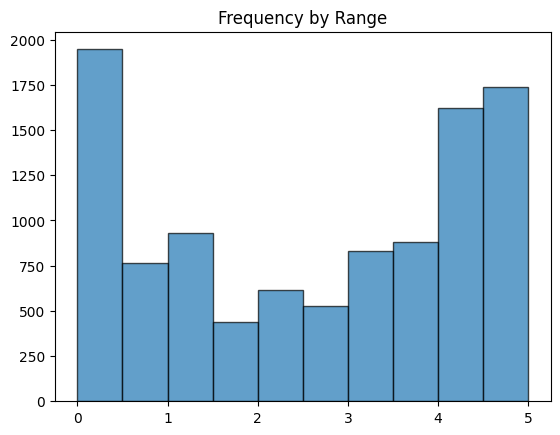

In [24]:
import numpy as np
import matplotlib.pyplot as plt

frequencies = list(dataset['label'].values)

# 히스토그램으로 빈도수 분포를 시각화 (bin 설정 가능)
bins = np.arange(1, max(frequencies) + 2, 0.5) - 1  # 빈도를 기준으로 bin을 설정
print(bins)
plt.hist(frequencies, bins=bins[:-1], edgecolor='black', alpha=0.7)

# 그래프 제목 및 축 라벨 설정
plt.title('Frequency by Range')

# 그래프 표시
plt.show()

label 별 데이터 분포

/var/folders/ln/gwgfj86n79l8sgq9_b4m1fpc0000gn/T/ipykernel_6835/37785825.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="Blues_d")


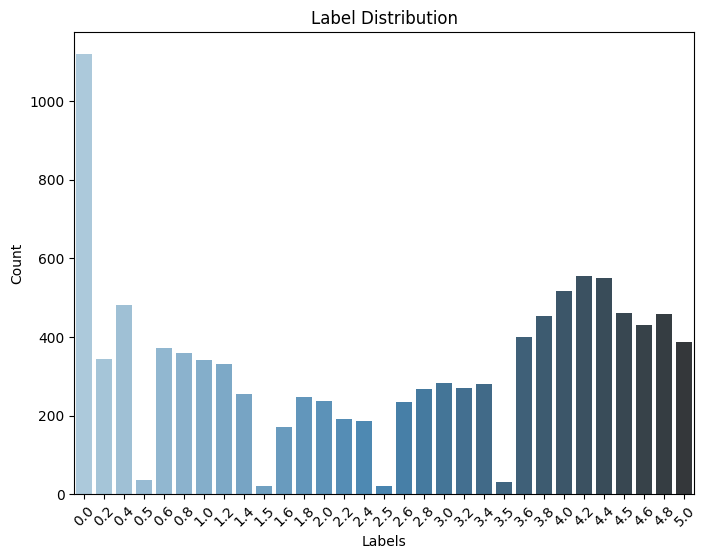

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 각 라벨 값의 개수를 집계
label_counts = dataset['label'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="Blues_d")

# 그래프 설정
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

## label 0.0을 제외한 데이터셋 Swap

In [32]:
dataset = pd.read_csv('augmentation_biassed.csv')
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-3490,nsmc-sampled,너무 잼나여. 완벽해!!!.,너무 재밌어요 ㅠㅠ!!!,3.4,1.0
1,boostcamp-sts-v1-train-1600,nsmc-sampled,작가가 이런 대를 보내면서 자랐나봄...,이런 대공감 영화가 있는지 몰랐네...,0.0,0.0
2,boostcamp-sts-v1-train-5042,slack-rtt,많이 사용해봅시다. 업업업!!!,많이 사용합시다. 업 업!!!,4.0,1.0
3,boostcamp-sts-v1-train-042,petition-sampled,소년법을 폐지해주시기 바랍니다,청소년 보호법 폐지해주시기 바랍니다.,3.8,1.0
4,boostcamp-sts-v1-train-5041,nsmc-sampled,완전 관객 사기치는 영화...,정말 시간 아까운 최악의 영화....,1.4,0.0
...,...,...,...,...,...,...
9989,boostcamp-sts-v1-train-6429,nsmc-rtt,"더더군다나 역사적 사실에 기초한것도아니고 인물만 갖다쓴 픽션 일뿐, 배우들에 연기도...",게다가 역사적 사실에 근거한 것도 아니고 그냥 등장인물들만 있는 픽션이고 배우들이 ...,3.8,1.0
9990,boostcamp-sts-v1-train-5814,petition-sampled,문재인 대통령님 삼성바이오로직스를 반드시 상장폐지 시켜야 할 이유 입니다.,"문재인 대통령님 삼성, 삼성바이오 분식회계 등 법적사회적 책임 다해야하며,삼성에서 ...",2.8,1.0
9991,boostcamp-sts-v1-train-6037,nsmc-sampled,기억에 남는 닌자영화...,기억에 남는장면도 없다..,0.8,0.0
9992,boostcamp-sts-v1-train-950,slack-sampled,아래 구글 시트에 내일 17:00 전까지 꼭 투표 및 정보기재 부탁드립니다~!,"바쁘시겠지만 오전 중으로, 아니면 오후 2시 전까지라도 꼭 좀 부탁드립니다~!",0.4,0.0


In [33]:
swap_dataset = dataset.rename(columns={
    'sentence_1': 'temp_sentence',
    'sentence_2': 'sentence_1'
})
swap_dataset = swap_dataset.rename(columns={
    'temp_sentence': 'sentence_2'
})

swap_dataset

,id,source,sentence_2,sentence_1,label,binary-label
0,boostcamp-sts-v1-train-3490,nsmc-sampled,너무 잼나여. 완벽해!!!.,너무 재밌어요 ㅠㅠ!!!,3.4,1.0
1,boostcamp-sts-v1-train-1600,nsmc-sampled,작가가 이런 대를 보내면서 자랐나봄...,이런 대공감 영화가 있는지 몰랐네...,0.0,0.0
2,boostcamp-sts-v1-train-5042,slack-rtt,많이 사용해봅시다. 업업업!!!,많이 사용합시다. 업 업!!!,4.0,1.0
3,boostcamp-sts-v1-train-042,petition-sampled,소년법을 폐지해주시기 바랍니다,청소년 보호법 폐지해주시기 바랍니다.,3.8,1.0
4,boostcamp-sts-v1-train-5041,nsmc-sampled,완전 관객 사기치는 영화...,정말 시간 아까운 최악의 영화....,1.4,0.0
...,...,...,...,...,...,...
9989,boostcamp-sts-v1-train-6429,nsmc-rtt,"더더군다나 역사적 사실에 기초한것도아니고 인물만 갖다쓴 픽션 일뿐, 배우들에 연기도...",게다가 역사적 사실에 근거한 것도 아니고 그냥 등장인물들만 있는 픽션이고 배우들이 ...,3.8,1.0
9990,boostcamp-sts-v1-train-5814,petition-sampled,문재인 대통령님 삼성바이오로직스를 반드시 상장폐지 시켜야 할 이유 입니다.,"문재인 대통령님 삼성, 삼성바이오 분식회계 등 법적사회적 책임 다해야하며,삼성에서 ...",2.8,1.0
9991,boostcamp-sts-v1-train-6037,nsmc-sampled,기억에 남는 닌자영화...,기억에 남는장면도 없다..,0.8,0.0
9992,boostcamp-sts-v1-train-950,slack-sampled,아래 구글 시트에 내일 17:00 전까지 꼭 투표 및 정보기재 부탁드립니다~!,"바쁘시겠지만 오전 중으로, 아니면 오후 2시 전까지라도 꼭 좀 부탁드립니다~!",0.4,0.0


In [34]:
swap_dataset = swap_dataset[swap_dataset['label'] != 0.0]
swap_dataset

,id,source,sentence_2,sentence_1,label,binary-label
0,boostcamp-sts-v1-train-3490,nsmc-sampled,너무 잼나여. 완벽해!!!.,너무 재밌어요 ㅠㅠ!!!,3.4,1.0
2,boostcamp-sts-v1-train-5042,slack-rtt,많이 사용해봅시다. 업업업!!!,많이 사용합시다. 업 업!!!,4.0,1.0
3,boostcamp-sts-v1-train-042,petition-sampled,소년법을 폐지해주시기 바랍니다,청소년 보호법 폐지해주시기 바랍니다.,3.8,1.0
4,boostcamp-sts-v1-train-5041,nsmc-sampled,완전 관객 사기치는 영화...,정말 시간 아까운 최악의 영화....,1.4,0.0
5,boostcamp-sts-v1-train-1779,nsmc-sampled,킬링타임으로도 절대보지마셈,킬링타임용으로 즐겨라 !!,1.0,0.0
...,...,...,...,...,...,...
9989,boostcamp-sts-v1-train-6429,nsmc-rtt,"더더군다나 역사적 사실에 기초한것도아니고 인물만 갖다쓴 픽션 일뿐, 배우들에 연기도...",게다가 역사적 사실에 근거한 것도 아니고 그냥 등장인물들만 있는 픽션이고 배우들이 ...,3.8,1.0
9990,boostcamp-sts-v1-train-5814,petition-sampled,문재인 대통령님 삼성바이오로직스를 반드시 상장폐지 시켜야 할 이유 입니다.,"문재인 대통령님 삼성, 삼성바이오 분식회계 등 법적사회적 책임 다해야하며,삼성에서 ...",2.8,1.0
9991,boostcamp-sts-v1-train-6037,nsmc-sampled,기억에 남는 닌자영화...,기억에 남는장면도 없다..,0.8,0.0
9992,boostcamp-sts-v1-train-950,slack-sampled,아래 구글 시트에 내일 17:00 전까지 꼭 투표 및 정보기재 부탁드립니다~!,"바쁘시겠지만 오전 중으로, 아니면 오후 2시 전까지라도 꼭 좀 부탁드립니다~!",0.4,0.0


In [35]:
dataset = pd.concat([dataset, swap_dataset], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-3490,nsmc-sampled,너무 잼나여. 완벽해!!!.,너무 재밌어요 ㅠㅠ!!!,3.4,1.0
1,boostcamp-sts-v1-train-1600,nsmc-sampled,작가가 이런 대를 보내면서 자랐나봄...,이런 대공감 영화가 있는지 몰랐네...,0.0,0.0
2,boostcamp-sts-v1-train-5042,slack-rtt,많이 사용해봅시다. 업업업!!!,많이 사용합시다. 업 업!!!,4.0,1.0
3,boostcamp-sts-v1-train-042,petition-sampled,소년법을 폐지해주시기 바랍니다,청소년 보호법 폐지해주시기 바랍니다.,3.8,1.0
4,boostcamp-sts-v1-train-5041,nsmc-sampled,완전 관객 사기치는 영화...,정말 시간 아까운 최악의 영화....,1.4,0.0
...,...,...,...,...,...,...
18864,boostcamp-sts-v1-train-6429,nsmc-rtt,게다가 역사적 사실에 근거한 것도 아니고 그냥 등장인물들만 있는 픽션이고 배우들이 ...,"더더군다나 역사적 사실에 기초한것도아니고 인물만 갖다쓴 픽션 일뿐, 배우들에 연기도...",3.8,1.0
18865,boostcamp-sts-v1-train-5814,petition-sampled,"문재인 대통령님 삼성, 삼성바이오 분식회계 등 법적사회적 책임 다해야하며,삼성에서 ...",문재인 대통령님 삼성바이오로직스를 반드시 상장폐지 시켜야 할 이유 입니다.,2.8,1.0
18866,boostcamp-sts-v1-train-6037,nsmc-sampled,기억에 남는장면도 없다..,기억에 남는 닌자영화...,0.8,0.0
18867,boostcamp-sts-v1-train-950,slack-sampled,"바쁘시겠지만 오전 중으로, 아니면 오후 2시 전까지라도 꼭 좀 부탁드립니다~!",아래 구글 시트에 내일 17:00 전까지 꼭 투표 및 정보기재 부탁드립니다~!,0.4,0.0


In [36]:
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
dataset = pd.DataFrame(dataset)
dataset.to_csv('augmentation_biassed_swaped.csv', index=False)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-4940,nsmc-sampled,초반에 노출 이라는 평점에 낚여 봤다.,저도 평점에 낚여서 본 사람..,2.4,0.0
1,boostcamp-sts-v1-train-8643,nsmc-sampled,다른영화보다 완전무서워,태어나서 본 영화중에 제일 무서움,2.8,1.0
2,NaN,NaN,무술 꼭 배워보고 싶었는데 시간이 안맞아서 너무 아쉬웠습니다.,무술 꼭 배워보고는 싶었는데 시간이 안맞아서 너무 아쉬웠습니다.,4.8,1.0
3,boostcamp-sts-v1-train-6825,slack-sampled,담에 또 어디선가 뵈어여!!,이번주 일욜에 제주서 또 뵈어용,1.8,0.0
4,boostcamp-sts-v1-train-2388,petition-sampled,기상청폐지시켜주십시요,여성부 폐지시켜주십시오,0.6,0.0
...,...,...,...,...,...,...
18864,boostcamp-sts-v1-train-8909,petition-rtt,위안부 피해자 온라인 명예훼손·조롱 처벌 강화,"온라인 명예훼손, 위안부 피해자 할머님들 조롱에 대한 처벌을 강화해주세요",4.2,1.0
18865,boostcamp-sts-v1-train-1783,nsmc-rtt,윌은 죽었다 오 잭스패로우의 매력은 어디까지?,윌이죽다니 아 잭스패로우 매력은어디까지냐 ㅋㅋ,4.2,1.0
18866,boostcamp-sts-v1-train-8874,slack-sampled,건강 관리 잘 하셔서 롱런하셨으면 좋겠습니다.,합류하시고나서 너무나도 바쁘게 업무 보고 계실것 같은데 건강도 잘 챙기면서 업무 보...,2.0,0.0
18867,boostcamp-sts-v1-train-4395,slack-sampled,사실 제 반팔도 우리 회사 반팔입니다!,4:1 우리 회사위 웃음을 주셨던 ㅎㅎㅎ 우리 회사 로고송도 기대됩니다!!!,0.6,0.0


0.5 범위 별 데이터 분포

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5]


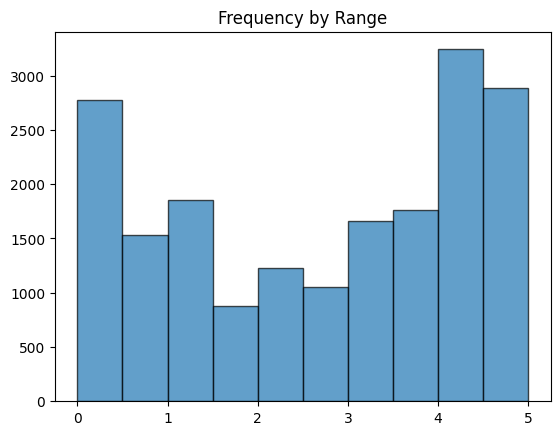

In [37]:
import numpy as np
import matplotlib.pyplot as plt

frequencies = list(dataset['label'].values)

# 히스토그램으로 빈도수 분포를 시각화 (bin 설정 가능)
bins = np.arange(1, max(frequencies) + 2, 0.5) - 1  # 빈도를 기준으로 bin을 설정
print(bins)
plt.hist(frequencies, bins=bins[:-1], edgecolor='black', alpha=0.7)

# 그래프 제목 및 축 라벨 설정
plt.title('Frequency by Range')

# 그래프 표시
plt.show()

label 별 데이터 분포

/var/folders/ln/gwgfj86n79l8sgq9_b4m1fpc0000gn/T/ipykernel_1848/37785825.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="Blues_d")


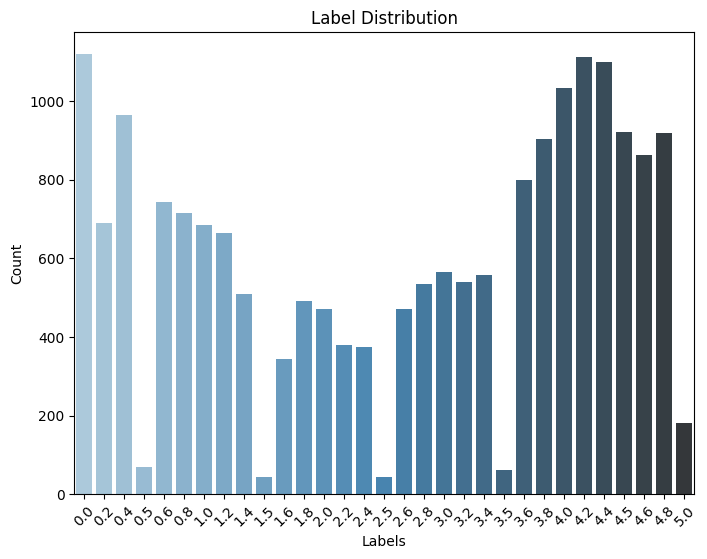

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 각 라벨 값의 개수를 집계
label_counts = dataset['label'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="Blues_d")

# 그래프 설정
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 그래프 출력
plt.show()